In [1]:
import pandas as pd

df = pd.read_csv('wos.complete.csv')

# extract a list of years
years = df['year'].tolist()
in_degrees = df['cited_by'].tolist()

print(years)
print(in_degrees)

[2022, 2019, 2020, 2020, 2020, 2019, 2019, 2020, 2019, 2019, 2012, 2022, 2022, 2020, 2021, 2016, 2020, 2019, 2023, 2019, 2021, 2021, 2019, 2023, 2021, 2018, 2021, 2023, 2021, 2022, 2022, 2019, 2022, 2021, 2023, 2020, 2021, 2023, 2022, 2021, 2020, 2015, 2022, 2020, 2020, 2020, 2023, 2021, 2020, 2022, 2021, 2022, 2022, 2020, 2022, 2020, 2022, 2022, 2021, 2018, 2023, 2022, 2022, 2021, 2019, 2022, 2023, 2022, 2022, 2022, 2022, 2018, 2023, 2023, 2021, 2021, 2022, 2023, 2022, 2021, 2021, 2022, 2022, 2020, 2022, 2021, 2019, 2021, 2023, 2020, 2021, 2016, 2020, 2022, 2022, 2020, 2018, 2022, 2022, 2022, 2021, 2023, 2022, 2022, 2019, 2023, 2022, 2021, 2022, 2022, 2018, 2022, 2022, 2019, 2019, 2023, 2022, 2019, 2021, 2021, 2022, 2020, 2023, 2022, 2021, 2023, 2021, 2022, 2019, 2019, 2023, 2022, 2021, 2018, 2021, 2023, 2022, 2021, 2021, 2023, 2023, 2023, 2019, 2022, 2023, 2022, 2019, 2023, 2019, 2021, 2022, 2018, 2023, 2023, 2022, 2023, 2018, 2020, 2019, 2023, 2022, 2021, 2019, 2019, 2020, 2018, 202

In [2]:
def findMax(test_list):
    max = 0
    thisi = 0
    max2 = 0
    max2i = 0
    max3 = 0
    max3i = 0
    for i in range(len(test_list)):
        if test_list[i] > max:
            max3 = max2
            max3i = max2i
            max2 = max
            max2i = thisi
            max = test_list[i]
            thisi = i
    
    return [(max, i), (max2, max2i), (max3, max3i)]

In [3]:
findMax(in_degrees)

[(280, 4950), (253, 3339), (117, 2587)]

In [4]:
print(df.at[4950, 'paper_id'])
print(df.at[3339, 'paper_id'])
print(df.at[2587, 'paper_id'])

10.1007/978-3-319-39552-4_3
10.1021/nl904092h
10.1109/JPROC.2017.2761740


In [5]:
def countLessThan(test_list, k):
    count = 0
    for i in test_list:
        if i < k:
            count = count + 1
    return count

In [6]:
def countGreaterThan(test_list, k):
    count = 0
    for i in test_list:
        if i > k:
            count = count + 1
    return count

3


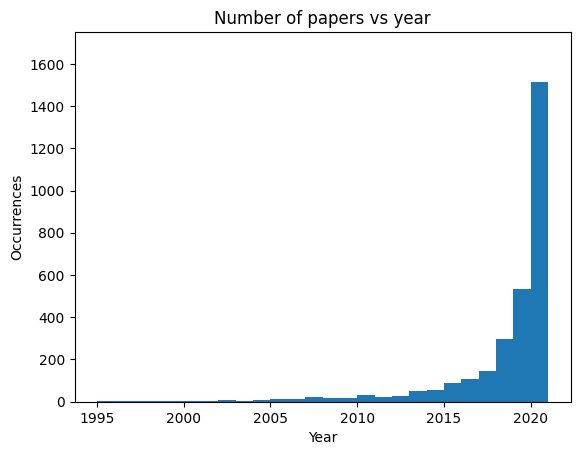

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

# binwidth = 5000
plt.hist(years, bins=np.arange(1995, 2022, 1))
plt.ylim(ymin=0, ymax = 1750)
plt.title("Number of papers vs year")
plt.xlabel("Year")
plt.ylabel("Occurrences")

print(countLessThan(years, 1990))

41


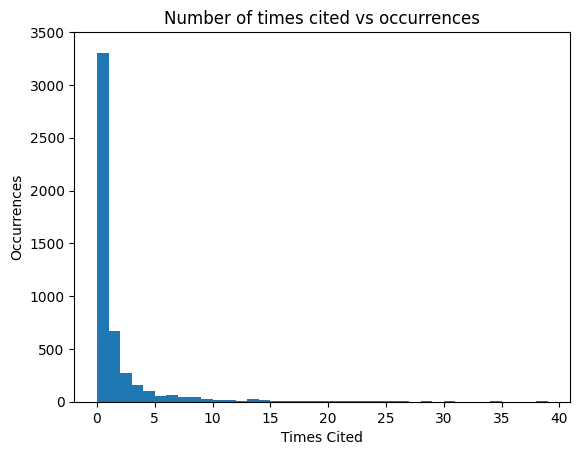

In [8]:
# binwidth = 5000
plt.hist(in_degrees, bins=np.arange(0, 40, 1))
plt.ylim(ymin=0, ymax = 3500)
plt.title("Number of times cited vs occurrences")
plt.xlabel("Times Cited")
plt.ylabel("Occurrences")

print(countGreaterThan(in_degrees, 40))

In [9]:
df = pd.read_csv('wos.complete.csv')

In [10]:
i = ['apple','red','apple','red','red','pear']
d = {x:i.count(x) for x in i}
print(d)

{'apple': 2, 'red': 3, 'pear': 1}


In [ ]:
# graphsage and node2vec

In [17]:
def findAverage(indegree_list):
    sum = 0
    for indegree in indegree_list:
        sum += indegree
    return sum / len(indegree_list)

In [14]:
year_indegree = {}

years = df['year'].tolist()
in_degrees = df['cited_by'].tolist()

for i in range(len(years)):
    if years[i] in year_indegree:
        year_indegree[years[i]] += [in_degrees[i]]
    else:
        year_indegree[years[i]] = [in_degrees[i]]

print(year_indegree[2018])

[1, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 10, 0, 0, 0, 3, 0, 0, 7, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 4, 1, 0, 0, 6, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 6, 0, 5, 18, 1, 5, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 3, 4, 1, 0, 0, 1, 0, 0, 1, 0, 0, 11, 2, 0, 0, 3, 0, 0, 2, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 15, 11, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 5, 0, 0, 0, 12, 0, 0, 1, 0, 1, 3, 1, 0, 0, 0, 0, 4, 1, 0, 0, 6, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 3, 1, 81, 6, 20, 0, 1, 3, 2, 0, 0, 42, 1, 2, 0, 1, 1, 13, 0, 0, 0, 1, 1, 0, 2, 0, 26, 0, 16, 3, 10, 1, 1, 0, 5, 0, 4, 4, 7, 2, 41, 1, 13, 0, 5, 6, 6, 1, 0, 2, 4, 8, 8, 1, 14, 10, 14, 3, 0, 1, 5, 82, 11, 0, 14, 2, 19, 1, 8, 0, 9, 18, 1, 0, 2, 3, 10, 4, 0, 0, 13, 24, 0, 6, 5, 2, 2, 1, 0, 23, 0, 0, 0, 1, 5, 0, 7, 0, 1, 50, 54, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 7, 13, 22, 5, 2, 0, 3, 0, 3, 0, 0, 4, 0, 0, 0, 0, 10, 5, 0, 0, 1, 2, 1, 74, 0, 0, 0, 0, 1, 0, 0, 0, 0, 20, 1]


In [19]:
complete_years = []
complete_indegrees_by_year = []
for year in year_indegree:
    if (year == 0):
        continue

    complete_years += [year]
    complete_indegrees_by_year += [findAverage(year_indegree[year])]

print(complete_years)
print(complete_indegrees_by_year)

[2022, 2019, 2020, 2012, 2021, 2016, 2023, 2018, 2015, 2014, 2010, 2017, 2011, 2004, 1993, 2024, 2013, 2007, 2006, 1996, 2009, 2008, 1999, 1997, 1995, 2002, 2000, 2005, 1990, 1998, 2001, 1994, 2003, 1971, 1989, 1991, 1992]
[0.5062166962699822, 3.1252336448598133, 2.642105263157895, 1.8214285714285714, 1.3945818610129563, 6.672897196261682, 0.11524163568773234, 3.879194630872483, 2.8850574712643677, 6.4363636363636365, 11.419354838709678, 5.793103448275862, 3.9523809523809526, 12.3, 0.0, 0.0, 6.244897959183674, 1.6521739130434783, 5.0, 0.8, 5.823529411764706, 2.8421052631578947, 1.4, 70.0, 0.6666666666666666, 6.625, 0.25, 3.9285714285714284, 2.0, 0.5, 2.2, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


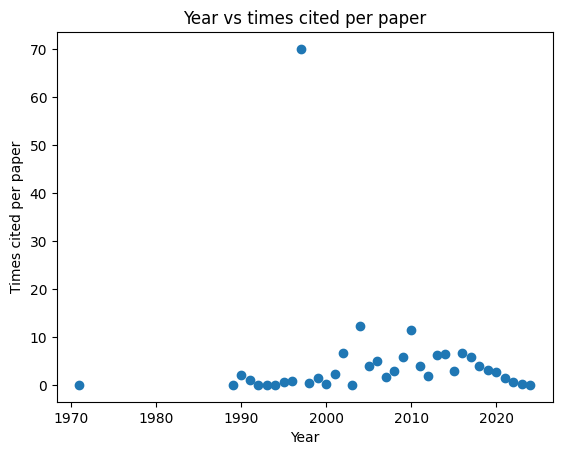

In [25]:
plt.scatter(complete_years, complete_indegrees_by_year)  # Plot the chart 
plt.title("Year vs times cited per paper")
plt.xlabel("Year")
plt.ylabel("Times cited per paper")
plt.show()  # display 

In [24]:
years = df['year'].tolist()

for i in range(len(years)):
    if (years[i] == 1997):
        print(df.at[i, 'paper_id'])

10.1016/S0360-3016(97)00281-2
10.1109/NEBC.1997.594936
10.1016/S0893-6080(97)00011-7
10.1016/S0304-3940(97)00612-5
